In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.datasets import fetch_openml

In [2]:
fmnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(675)
indices = np.random.choice(70000,10000, replace=False)

In [4]:
X = (fmnist.data).iloc[indices]
y = (fmnist.target)[indices]

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
umapdr = UMAP(n_components = 2)

In [7]:
X_umap = umapdr.fit_transform(X)

<AxesSubplot:xlabel='x', ylabel='y'>

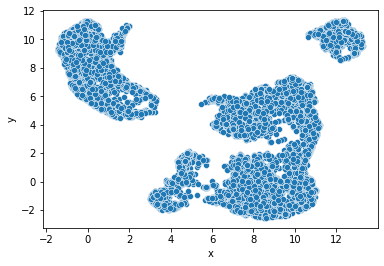

In [8]:
df = pd.DataFrame({
    'x':X_umap[:,0],
    'y':X_umap[:,1],
    'labels':y
})
sns.scatterplot(x='x',y='y',data=df)

Compared to tSNE and PCA you definitely see seperations of groups.

<AxesSubplot:xlabel='x', ylabel='y'>

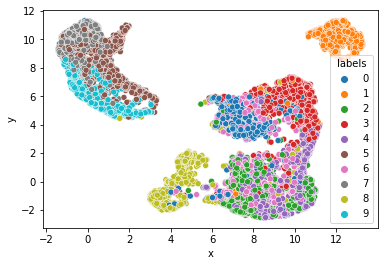

In [10]:
sns.scatterplot(x='x',y='y',hue='labels',data=df)

Like with other dimensionality reduction, there is mixing of labels.  But if you didn't know labels, I would suggest trying 3, 5 and more clusters.

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, metric='euclidean'):
    u = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
    X_umap = u.fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot()
    sns.scatterplot(x=X_umap[:,0],y=X_umap[:,1],ax=ax)
    ax.set_title("{} neighbors, {} distance, {} metric".format(n_neighbors,min_dist,metric))